In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('german.csv', delimiter=';')
df.head()

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [20]:
#identifying the numerical and categorical columns will help in scaling and one-hot encoding of columns later.
numericals = ["Duration_of_Credit_monthly", "Credit_Amount", "Length_of_current_employment", "Instalment_per_cent", "Duration_in_Current_address", "Age_years",
"No_of_Credits_at_this_Bank"]
categoricals = list(set(df.columns) - set(numericals + ['Creditability']))
categoricals

['Occupation',
 'Purpose',
 'Account_Balance',
 'Type_of_apartment',
 'Foreign_Worker',
 'Value_Savings_Stocks',
 'Telephone',
 'Concurrent_Credits',
 'Payment_Status_of_Previous_Credit',
 'Sex_Marital_Status',
 'Guarantors',
 'Most_valuable_available_asset',
 'No_of_dependents']

In [21]:
df.describe()
#looking at the characteristics of the numerical columns

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [22]:
df.isna().sum()
# checking if there is any null value is important as they should be handled before creating the model

Creditability                        0
Account_Balance                      0
Duration_of_Credit_monthly           0
Payment_Status_of_Previous_Credit    0
Purpose                              0
Credit_Amount                        0
Value_Savings_Stocks                 0
Length_of_current_employment         0
Instalment_per_cent                  0
Sex_Marital_Status                   0
Guarantors                           0
Duration_in_Current_address          0
Most_valuable_available_asset        0
Age_years                            0
Concurrent_Credits                   0
Type_of_apartment                    0
No_of_Credits_at_this_Bank           0
Occupation                           0
No_of_dependents                     0
Telephone                            0
Foreign_Worker                       0
dtype: int64

In [23]:
df['Credit_Amount'].describe()

count     1000.00000
mean      3271.24800
std       2822.75176
min        250.00000
25%       1365.50000
50%       2319.50000
75%       3972.25000
max      18424.00000
Name: Credit_Amount, dtype: float64

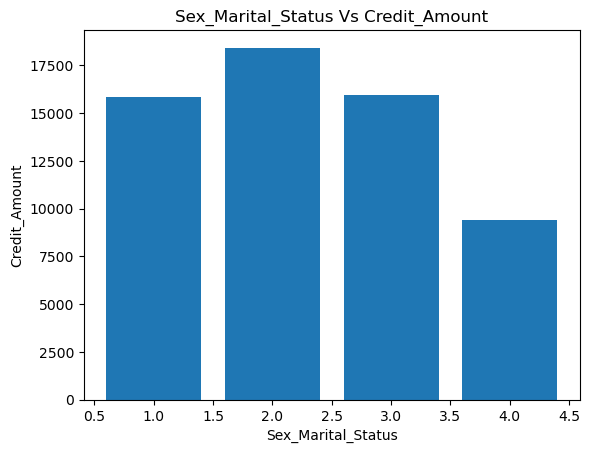

In [24]:
plt.bar(df['Sex_Marital_Status'], df['Credit_Amount'])
plt.xlabel('Sex_Marital_Status')
plt.ylabel('Credit_Amount')
plt.title('Sex_Marital_Status Vs Credit_Amount')
plt.show()

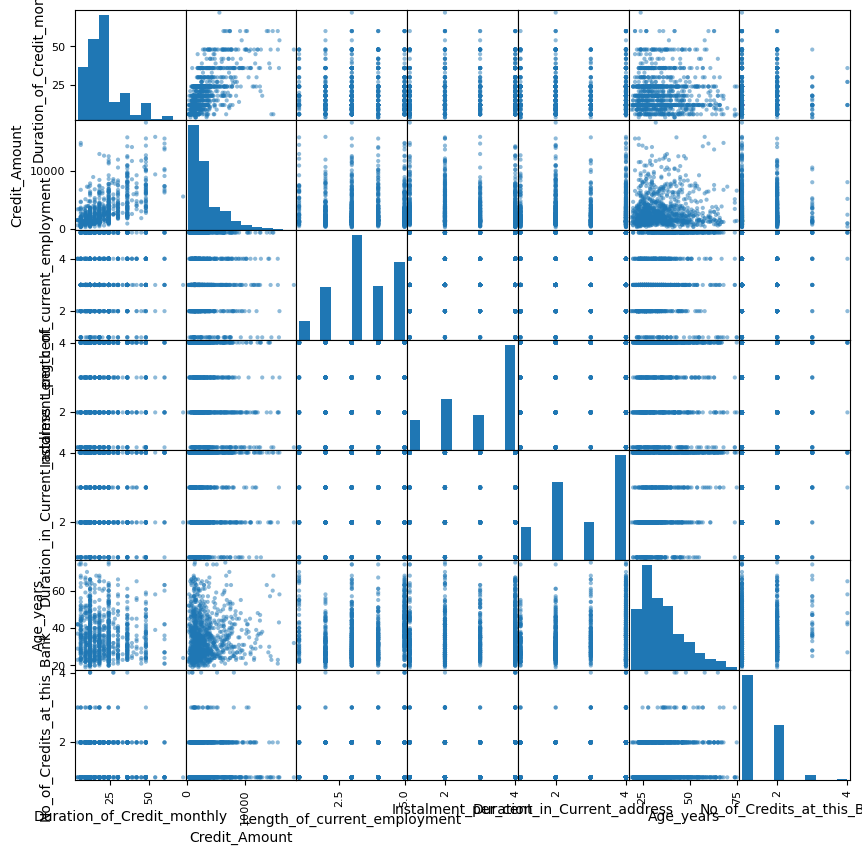

In [25]:
pd.plotting.scatter_matrix(df[["Duration_of_Credit_monthly", "Credit_Amount", "Length_of_current_employment", "Instalment_per_cent", "Duration_in_Current_address", "Age_years",
"No_of_Credits_at_this_Bank"]], figsize=(10, 10));
#visualizing the relationship between numerical values. Apert from duration_of_credit_monthly and credit_amount, there is no
# observable correlation between the variables. However, this doesnot mean that the variable cannot be used to predict Credibility.
#lack of correlation doesnt mean that they are unrelated. for instance, combination of 2 or more of this features, could be a
# strong prediction of creditability

<Axes: xlabel='Purpose', ylabel='Credit_Amount'>

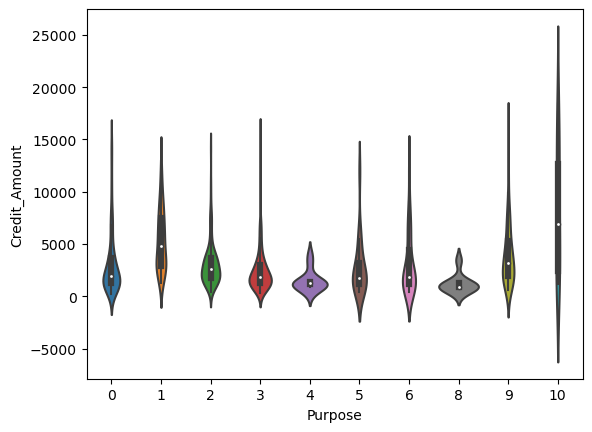

In [26]:
sns.violinplot(data=df, x='Purpose', y='Credit_Amount', figsize=(30,30))
# The amount of credit fairly varies for different purposes, purpose 0, 2, 3, 6, 9 have similar credit amount distribution.
# purpose 4 and 8 tend to have similar and compacted range(less than 5000 euro) which is quite different from the rest.
# purpose 10 has the most peculiar credit amount distribution, with the highest mean and a long range(upto 25000).

<Axes: xlabel='Purpose', ylabel='Credit_Amount'>

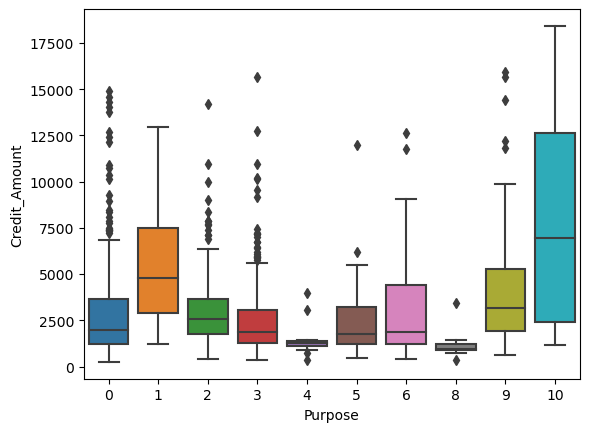

In [27]:
sns.boxplot(data=df, x='Purpose', y='Credit_Amount')

<Axes: xlabel='Creditability', ylabel='Credit_Amount'>

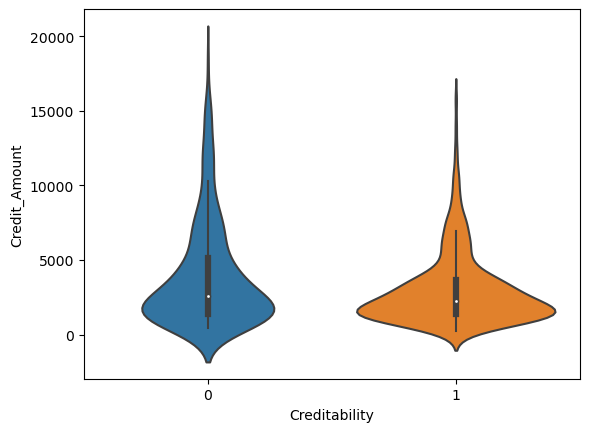

In [28]:
sns.violinplot(data=df, x='Creditability', y='Credit_Amount', figsize=(30,30))

<Axes: xlabel='Creditability', ylabel='Age_years'>

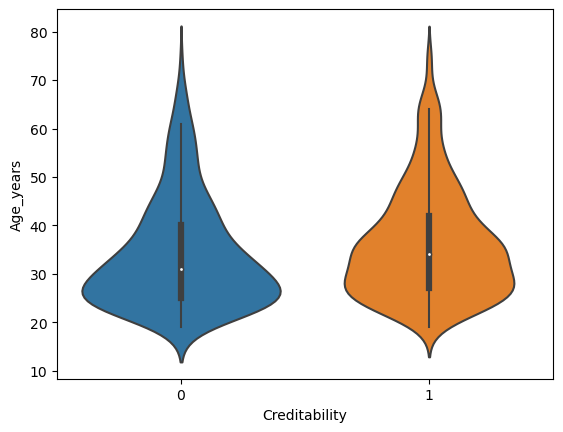

In [29]:
sns.violinplot(data=df, x='Creditability', y='Age_years')
# no observable relationship between age and creditability.

In [30]:
cols = list(set(df.columns)-set(['Duration_of_Credit_monthly', 'Credit_Amount', 'Age_years', 'Creditability']))


In [31]:
contingency_table = pd.crosstab(df['Account_Balance'], df['Creditability'])
contingency_table

Creditability,0,1
Account_Balance,,
1,135,139
2,105,164
3,14,49
4,46,348


<Axes: xlabel='Account_Balance'>

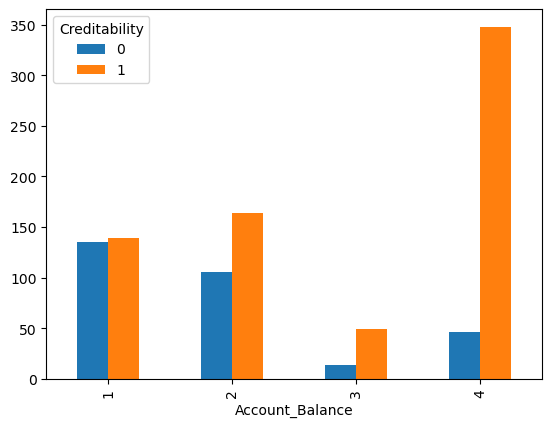

In [32]:
contingency_table.plot(kind='bar')
# Account balance 4 is strong predictor of creditability as it can be seen on the figure below.

<Axes: xlabel='Value_Savings_Stocks'>

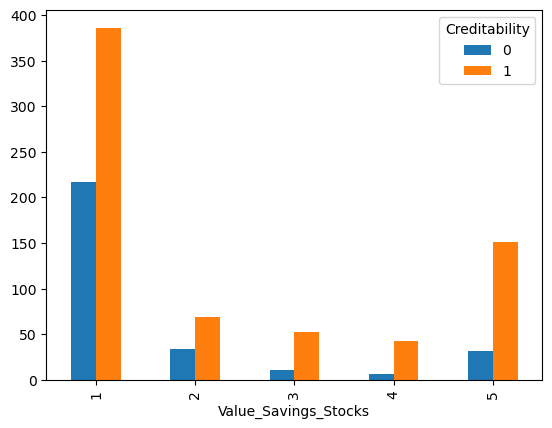

In [33]:
contingency_table = pd.crosstab(df['Value_Savings_Stocks'], df['Creditability'])
contingency_table.plot(kind='bar')
# there is some level of relationship between Value_Savings_Stocks, and creditability. 
# as the saving/stock value increase the height of the orange bar is increasing which indicates more creditability.

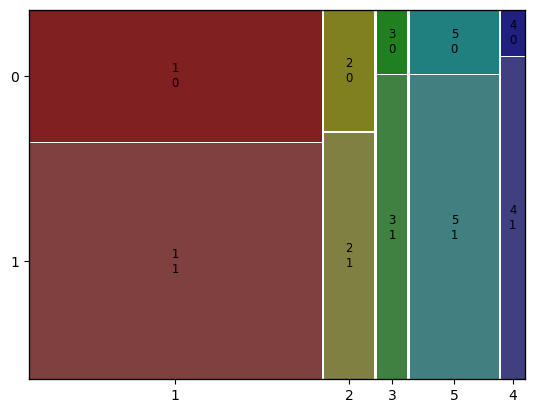

In [34]:
import statsmodels.graphics.mosaicplot as mosaic
mosaic.mosaic(df, ['Value_Savings_Stocks', 'Creditability'])
plt.show()

In [35]:
creditability = df['Creditability']

In [36]:
df = df.drop(['Creditability'], axis=1)

In [37]:
df[numericals].describe()

,Duration_of_Credit_monthly,Credit_Amount,Length_of_current_employment,Instalment_per_cent,Duration_in_Current_address,Age_years,No_of_Credits_at_this_Bank
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,20.903000,3271.24800,3.384000,2.973000,2.845000,35.54200,1.407000
std,12.058814,2822.75176,1.208306,1.118715,1.103718,11.35267,0.577654
min,4.000000,250.00000,1.000000,1.000000,1.000000,19.00000,1.000000
25%,12.000000,1365.50000,3.000000,2.000000,2.000000,27.00000,1.000000
50%,18.000000,2319.50000,3.000000,3.000000,3.000000,33.00000,1.000000
75%,24.000000,3972.25000,5.000000,4.000000,4.000000,42.00000,2.000000
max,72.000000,18424.00000,5.000000,4.000000,4.000000,75.00000,4.000000


In [38]:
numericals

['Duration_of_Credit_monthly',
 'Credit_Amount',
 'Length_of_current_employment',
 'Instalment_per_cent',
 'Duration_in_Current_address',
 'Age_years',
 'No_of_Credits_at_this_Bank']

In [39]:
# it is crucial to scale the numerical features to speed up the convergence of the algorithms.
# categorical features are one hot encoded which will make it easy for the ML algorithm to learn fast. 
# one hot encoding will create more features preventing the model from overfitting.

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
ct = ColumnTransformer(transformers=[('Scaling', StandardScaler(), numericals),
                                      ('one-hot encoding', OneHotEncoder(), categoricals)
                                    ])
df_cleaned = ct.fit_transform(df)
df_cleaned

array([[-0.24085723, -0.78765692, -1.14597811, ...,  0.        ,
         1.        ,  0.        ],
       [-0.9875727 , -0.16738429, -0.31795924, ...,  0.        ,
         0.        ,  1.        ],
       [-0.73866754, -0.86138075,  0.51005962, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.00804793,  3.3348522 ,  1.33807849, ...,  1.        ,
         1.        ,  0.        ],
       [-0.73866754,  1.13306158, -1.97399698, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.75476341,  1.09123749,  1.33807849, ...,  0.        ,
         1.        ,  0.        ]])

In [40]:
df_cleaned.shape


(1000, 58)

In [41]:
df.columns

Index(['Account_Balance', 'Duration_of_Credit_monthly',
       'Payment_Status_of_Previous_Credit', 'Purpose', 'Credit_Amount',
       'Value_Savings_Stocks', 'Length_of_current_employment',
       'Instalment_per_cent', 'Sex_Marital_Status', 'Guarantors',
       'Duration_in_Current_address', 'Most_valuable_available_asset',
       'Age_years', 'Concurrent_Credits', 'Type_of_apartment',
       'No_of_Credits_at_this_Bank', 'Occupation', 'No_of_dependents',
       'Telephone', 'Foreign_Worker'],
      dtype='object')

In [42]:
ct.get_feature_names_out().shape

(58,)

In [43]:
df_cleaned = pd.DataFrame(df_cleaned, columns=ct.get_feature_names_out())

In [44]:
df_cleaned['Creditability'] = creditability

In [45]:
df_cleaned.head()

,Scaling__Duration_of_Credit_monthly,Scaling__Credit_Amount,Scaling__Length_of_current_employment,Scaling__Instalment_per_cent,Scaling__Duration_in_Current_address,Scaling__Age_years,Scaling__No_of_Credits_at_this_Bank,one-hot encoding__Occupation_1,one-hot encoding__Occupation_2,one-hot encoding__Occupation_3,...,one-hot encoding__Guarantors_1,one-hot encoding__Guarantors_2,one-hot encoding__Guarantors_3,one-hot encoding__Most_valuable_available_asset_1,one-hot encoding__Most_valuable_available_asset_2,one-hot encoding__Most_valuable_available_asset_3,one-hot encoding__Most_valuable_available_asset_4,one-hot encoding__No_of_dependents_1,one-hot encoding__No_of_dependents_2,Creditability
0,-0.240857,-0.787657,-1.145978,0.918477,1.046987,-1.281573,-0.704926,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
1,-0.987573,-0.167384,-0.317959,-0.870183,-0.765977,0.040363,1.027079,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
2,-0.738668,-0.861381,0.510060,-0.870183,1.046987,-1.105315,-0.704926,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
3,-0.738668,-0.407341,-0.317959,0.024147,-0.765977,0.304750,1.027079,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
4,-0.738668,-0.389974,-0.317959,0.918477,1.046987,0.216621,1.027079,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1


<Axes: xlabel='Creditability', ylabel='count'>

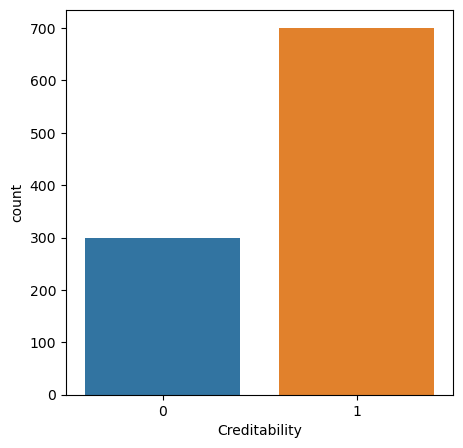

In [46]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df_cleaned, x='Creditability')
# there is a clear imbalance in the dataset as the examples of both class are not equal.

<Axes: xlabel='Creditability', ylabel='count'>

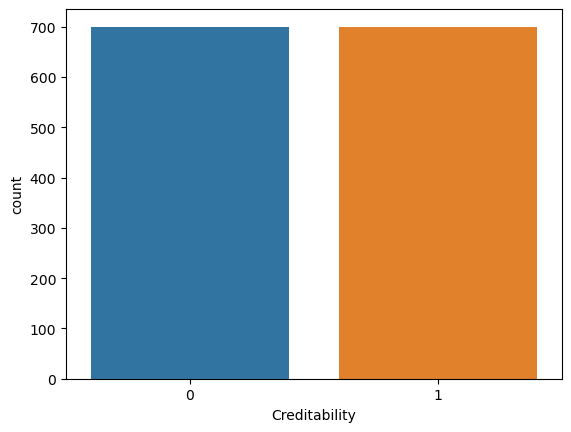

In [47]:
#oversampling is a technique used to increase the instances of minority class, in this case the negative class.
# SMOTE is a technique used to oversample the mminority class by interpolating among the existing samples.
# it works by finding the K-nearest neighbors of the each minority instance, and calculating the Linear Combination of the neighbots
from sklearn.model_selection import train_test_split
import xgboost as xgb

X = df_cleaned.drop(['Creditability'], axis=1)
y = df_cleaned['Creditability']

from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=2)
x_bal, y_bal = oversample.fit_resample(X, y)
sns.countplot(pd.DataFrame(y_bal), x = 'Creditability')

<Axes: xlabel='Creditability', ylabel='count'>

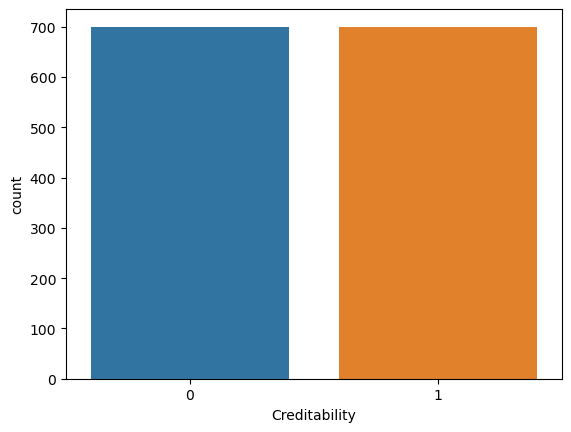

In [48]:
sns.countplot(pd.DataFrame(y_bal), x = 'Creditability')

In [49]:


x_train, x_test, y_train, y_test = train_test_split(x_bal, y_bal, test_size = 0.25)

clf = xgb.XGBClassifier()
clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
predicted = clf.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, predicted))
print('fl_Score: ', f1_score(y_test, predicted))
print('Precision: ', precision_score(y_test, predicted))
print('recall: ', recall_score(y_test, predicted))
# The recall of the model is greater than precision which indicates that the model will not miss much of creditable customer.
# it prioiritize increasing creditable predictions, than not being wrong.
# precision: what proportion of creditable(output 1)prediction was actually creditable? cares about how correct my prediction is
# recall: what proportion of actually creditable people are classified as creditable(output 1)? how good i am at predicting a 
# a customer that is creditable(actual) as a creditable(predition of 1). 
# precision = true positive/predicted positive......measured w.r.t predictions made(how good at prediction being correct)
# recall = true positive/actual positive.....measure w.r.t actual positive(how good at capturing actual positives) 

Accuracy:  0.8428571428571429
fl_Score:  0.8525469168900804
Precision:  0.8324607329842932
recall:  0.8736263736263736


In [36]:
clf = xgb.XGBClassifier(learning_rate = 0.3, max_depth=6, n_estimators = 30, colsample_bytree=0.9)
clf.fit(x_train, y_train)

predicted = clf.predict(x_test)
accuracy_score(y_test, predicted)

0.8571428571428571

In [52]:
x_train.shape

(1050, 58)

#  Gridsearch

In [53]:
from sklearn.model_selection import GridSearchCV
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.1, 0.3, 0.4, 0.5],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}
mdl = xgb.XGBClassifier(seed=20)
clf = GridSearchCV(estimator=mdl, 
                  param_grid=params, 
                  scoring='accuracy', 
                  verbose=1)
clf.fit(x_train, y_train)
print('Best parameters: ', clf.best_params_)
print('Accuracy: ', clf.best_score_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters:  {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Accuracy:  0.821904761904762


# catboost and LGBM

In [75]:
from catboost import CatBoostClassifier
catb_clf = CatBoostClassifier()
catb_clf.fit(x_train, y_train)

predicted = catb_clf.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, predicted))
print('fl_Score: ', f1_score(y_test, predicted))
print('Precision: ', precision_score(y_test, predicted))
print('recall: ', recall_score(y_test, predicted))

Learning rate set to 0.010519
0:	learn: 0.6897342	total: 181ms	remaining: 3m
1:	learn: 0.6857194	total: 200ms	remaining: 1m 39s
2:	learn: 0.6822889	total: 212ms	remaining: 1m 10s
3:	learn: 0.6787514	total: 224ms	remaining: 55.8s
4:	learn: 0.6749993	total: 237ms	remaining: 47.2s
5:	learn: 0.6713838	total: 263ms	remaining: 43.6s
6:	learn: 0.6680309	total: 281ms	remaining: 39.9s
7:	learn: 0.6649451	total: 292ms	remaining: 36.2s
8:	learn: 0.6613976	total: 301ms	remaining: 33.2s
9:	learn: 0.6576862	total: 314ms	remaining: 31s
10:	learn: 0.6546402	total: 324ms	remaining: 29.1s
11:	learn: 0.6517658	total: 334ms	remaining: 27.5s
12:	learn: 0.6483413	total: 344ms	remaining: 26.1s
13:	learn: 0.6449771	total: 354ms	remaining: 24.9s
14:	learn: 0.6417267	total: 363ms	remaining: 23.8s
15:	learn: 0.6380632	total: 372ms	remaining: 22.9s
16:	learn: 0.6347011	total: 380ms	remaining: 22s
17:	learn: 0.6318542	total: 389ms	remaining: 21.2s
18:	learn: 0.6293060	total: 398ms	remaining: 20.6s
19:	learn: 0.626

172:	learn: 0.4123237	total: 2.1s	remaining: 10.1s
173:	learn: 0.4116605	total: 2.12s	remaining: 10.1s
174:	learn: 0.4109736	total: 2.15s	remaining: 10.1s
175:	learn: 0.4099494	total: 2.17s	remaining: 10.2s
176:	learn: 0.4092760	total: 2.18s	remaining: 10.2s
177:	learn: 0.4086621	total: 2.2s	remaining: 10.2s
178:	learn: 0.4081662	total: 2.21s	remaining: 10.1s
179:	learn: 0.4075739	total: 2.22s	remaining: 10.1s
180:	learn: 0.4069217	total: 2.23s	remaining: 10.1s
181:	learn: 0.4062311	total: 2.24s	remaining: 10.1s
182:	learn: 0.4055166	total: 2.25s	remaining: 10s
183:	learn: 0.4048597	total: 2.26s	remaining: 10s
184:	learn: 0.4043945	total: 2.27s	remaining: 9.99s
185:	learn: 0.4036516	total: 2.28s	remaining: 9.97s
186:	learn: 0.4028597	total: 2.3s	remaining: 10s
187:	learn: 0.4021076	total: 2.32s	remaining: 10s
188:	learn: 0.4012977	total: 2.34s	remaining: 10s
189:	learn: 0.4005687	total: 2.35s	remaining: 10s
190:	learn: 0.3998948	total: 2.36s	remaining: 9.99s
191:	learn: 0.3994249	total

347:	learn: 0.3213062	total: 4.65s	remaining: 8.71s
348:	learn: 0.3209767	total: 4.66s	remaining: 8.7s
349:	learn: 0.3206303	total: 4.68s	remaining: 8.69s
350:	learn: 0.3200124	total: 4.69s	remaining: 8.68s
351:	learn: 0.3195605	total: 4.7s	remaining: 8.66s
352:	learn: 0.3192518	total: 4.71s	remaining: 8.64s
353:	learn: 0.3189122	total: 4.72s	remaining: 8.62s
354:	learn: 0.3185652	total: 4.73s	remaining: 8.6s
355:	learn: 0.3181732	total: 4.74s	remaining: 8.58s
356:	learn: 0.3178152	total: 4.75s	remaining: 8.56s
357:	learn: 0.3174032	total: 4.76s	remaining: 8.54s
358:	learn: 0.3172287	total: 4.77s	remaining: 8.52s
359:	learn: 0.3169369	total: 4.78s	remaining: 8.5s
360:	learn: 0.3166332	total: 4.79s	remaining: 8.48s
361:	learn: 0.3163319	total: 4.8s	remaining: 8.46s
362:	learn: 0.3160268	total: 4.81s	remaining: 8.44s
363:	learn: 0.3155385	total: 4.82s	remaining: 8.42s
364:	learn: 0.3150560	total: 4.83s	remaining: 8.4s
365:	learn: 0.3145994	total: 4.84s	remaining: 8.39s
366:	learn: 0.3143

526:	learn: 0.2628078	total: 7.01s	remaining: 6.29s
527:	learn: 0.2625644	total: 7.02s	remaining: 6.28s
528:	learn: 0.2623113	total: 7.03s	remaining: 6.26s
529:	learn: 0.2620326	total: 7.04s	remaining: 6.25s
530:	learn: 0.2617331	total: 7.05s	remaining: 6.23s
531:	learn: 0.2614412	total: 7.06s	remaining: 6.21s
532:	learn: 0.2611891	total: 7.07s	remaining: 6.2s
533:	learn: 0.2608223	total: 7.09s	remaining: 6.18s
534:	learn: 0.2605784	total: 7.1s	remaining: 6.17s
535:	learn: 0.2601381	total: 7.11s	remaining: 6.15s
536:	learn: 0.2598866	total: 7.12s	remaining: 6.13s
537:	learn: 0.2596937	total: 7.12s	remaining: 6.12s
538:	learn: 0.2593532	total: 7.13s	remaining: 6.1s
539:	learn: 0.2590537	total: 7.14s	remaining: 6.08s
540:	learn: 0.2588453	total: 7.15s	remaining: 6.07s
541:	learn: 0.2585958	total: 7.16s	remaining: 6.05s
542:	learn: 0.2582963	total: 7.17s	remaining: 6.04s
543:	learn: 0.2580144	total: 7.18s	remaining: 6.02s
544:	learn: 0.2576757	total: 7.19s	remaining: 6s
545:	learn: 0.2573

700:	learn: 0.2186975	total: 9.17s	remaining: 3.91s
701:	learn: 0.2184562	total: 9.19s	remaining: 3.9s
702:	learn: 0.2181885	total: 9.2s	remaining: 3.89s
703:	learn: 0.2178898	total: 9.22s	remaining: 3.88s
704:	learn: 0.2177026	total: 9.24s	remaining: 3.87s
705:	learn: 0.2173916	total: 9.25s	remaining: 3.85s
706:	learn: 0.2171716	total: 9.27s	remaining: 3.84s
707:	learn: 0.2168756	total: 9.29s	remaining: 3.83s
708:	learn: 0.2166300	total: 9.3s	remaining: 3.82s
709:	learn: 0.2164446	total: 9.31s	remaining: 3.8s
710:	learn: 0.2161239	total: 9.33s	remaining: 3.79s
711:	learn: 0.2158763	total: 9.34s	remaining: 3.78s
712:	learn: 0.2156156	total: 9.35s	remaining: 3.76s
713:	learn: 0.2154111	total: 9.37s	remaining: 3.75s
714:	learn: 0.2152688	total: 9.38s	remaining: 3.74s
715:	learn: 0.2149170	total: 9.4s	remaining: 3.73s
716:	learn: 0.2147553	total: 9.42s	remaining: 3.72s
717:	learn: 0.2145246	total: 9.43s	remaining: 3.71s
718:	learn: 0.2143453	total: 9.45s	remaining: 3.69s
719:	learn: 0.214

867:	learn: 0.1824569	total: 11.1s	remaining: 1.69s
868:	learn: 0.1821953	total: 11.1s	remaining: 1.67s
869:	learn: 0.1819732	total: 11.1s	remaining: 1.66s
870:	learn: 0.1817479	total: 11.1s	remaining: 1.65s
871:	learn: 0.1815255	total: 11.1s	remaining: 1.63s
872:	learn: 0.1812682	total: 11.1s	remaining: 1.62s
873:	learn: 0.1810735	total: 11.1s	remaining: 1.61s
874:	learn: 0.1809170	total: 11.2s	remaining: 1.59s
875:	learn: 0.1807877	total: 11.2s	remaining: 1.58s
876:	learn: 0.1805278	total: 11.2s	remaining: 1.57s
877:	learn: 0.1803468	total: 11.2s	remaining: 1.55s
878:	learn: 0.1801439	total: 11.2s	remaining: 1.54s
879:	learn: 0.1800763	total: 11.2s	remaining: 1.53s
880:	learn: 0.1798969	total: 11.2s	remaining: 1.51s
881:	learn: 0.1795745	total: 11.2s	remaining: 1.5s
882:	learn: 0.1795056	total: 11.2s	remaining: 1.49s
883:	learn: 0.1793496	total: 11.3s	remaining: 1.48s
884:	learn: 0.1791458	total: 11.3s	remaining: 1.46s
885:	learn: 0.1789628	total: 11.3s	remaining: 1.45s
886:	learn: 0

0.8314285714285714

In [76]:
from lightgbm import LGBMClassifier
lgbm_clf = CatBoostClassifier()
lgbm_clf.fit(x_train, y_train)

predicted = lgbm_clf.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, predicted))
print('fl_Score: ', f1_score(y_test, predicted))
print('Precision: ', precision_score(y_test, predicted))
print('recall: ', recall_score(y_test, predicted))

Learning rate set to 0.010519
0:	learn: 0.6897342	total: 10.6ms	remaining: 10.6s
1:	learn: 0.6857194	total: 20.5ms	remaining: 10.2s
2:	learn: 0.6822889	total: 30.1ms	remaining: 9.99s
3:	learn: 0.6787514	total: 39.3ms	remaining: 9.78s
4:	learn: 0.6749993	total: 50ms	remaining: 9.95s
5:	learn: 0.6713838	total: 59.8ms	remaining: 9.9s
6:	learn: 0.6680309	total: 70.1ms	remaining: 9.94s
7:	learn: 0.6649451	total: 80.6ms	remaining: 9.99s
8:	learn: 0.6613976	total: 90.1ms	remaining: 9.92s
9:	learn: 0.6576862	total: 101ms	remaining: 10s
10:	learn: 0.6546402	total: 112ms	remaining: 10s
11:	learn: 0.6517658	total: 121ms	remaining: 9.98s
12:	learn: 0.6483413	total: 132ms	remaining: 10s
13:	learn: 0.6449771	total: 142ms	remaining: 10s
14:	learn: 0.6417267	total: 152ms	remaining: 9.95s
15:	learn: 0.6380632	total: 162ms	remaining: 9.96s
16:	learn: 0.6347011	total: 173ms	remaining: 9.98s
17:	learn: 0.6318542	total: 183ms	remaining: 9.96s
18:	learn: 0.6293060	total: 192ms	remaining: 9.93s
19:	learn: 0.

166:	learn: 0.4172849	total: 2.13s	remaining: 10.6s
167:	learn: 0.4162166	total: 2.14s	remaining: 10.6s
168:	learn: 0.4153798	total: 2.15s	remaining: 10.6s
169:	learn: 0.4144938	total: 2.16s	remaining: 10.6s
170:	learn: 0.4135957	total: 2.18s	remaining: 10.6s
171:	learn: 0.4131209	total: 2.19s	remaining: 10.5s
172:	learn: 0.4123237	total: 2.2s	remaining: 10.5s
173:	learn: 0.4116605	total: 2.21s	remaining: 10.5s
174:	learn: 0.4109736	total: 2.22s	remaining: 10.5s
175:	learn: 0.4099494	total: 2.23s	remaining: 10.5s
176:	learn: 0.4092760	total: 2.24s	remaining: 10.4s
177:	learn: 0.4086621	total: 2.25s	remaining: 10.4s
178:	learn: 0.4081662	total: 2.26s	remaining: 10.4s
179:	learn: 0.4075739	total: 2.27s	remaining: 10.4s
180:	learn: 0.4069217	total: 2.28s	remaining: 10.3s
181:	learn: 0.4062311	total: 2.29s	remaining: 10.3s
182:	learn: 0.4055166	total: 2.3s	remaining: 10.3s
183:	learn: 0.4048597	total: 2.31s	remaining: 10.3s
184:	learn: 0.4043945	total: 2.32s	remaining: 10.2s
185:	learn: 0.

327:	learn: 0.3288598	total: 3.8s	remaining: 7.79s
328:	learn: 0.3283880	total: 3.81s	remaining: 7.78s
329:	learn: 0.3281197	total: 3.83s	remaining: 7.77s
330:	learn: 0.3277002	total: 3.84s	remaining: 7.76s
331:	learn: 0.3272121	total: 3.85s	remaining: 7.75s
332:	learn: 0.3269230	total: 3.86s	remaining: 7.74s
333:	learn: 0.3266087	total: 3.87s	remaining: 7.72s
334:	learn: 0.3262281	total: 3.88s	remaining: 7.71s
335:	learn: 0.3258429	total: 3.89s	remaining: 7.69s
336:	learn: 0.3254198	total: 3.9s	remaining: 7.67s
337:	learn: 0.3249752	total: 3.91s	remaining: 7.66s
338:	learn: 0.3246344	total: 3.92s	remaining: 7.64s
339:	learn: 0.3241342	total: 3.93s	remaining: 7.63s
340:	learn: 0.3237848	total: 3.94s	remaining: 7.61s
341:	learn: 0.3233559	total: 3.95s	remaining: 7.59s
342:	learn: 0.3227935	total: 3.96s	remaining: 7.58s
343:	learn: 0.3224470	total: 3.96s	remaining: 7.56s
344:	learn: 0.3221097	total: 3.98s	remaining: 7.55s
345:	learn: 0.3218615	total: 3.99s	remaining: 7.54s
346:	learn: 0.

503:	learn: 0.2696285	total: 6.17s	remaining: 6.07s
504:	learn: 0.2692864	total: 6.18s	remaining: 6.06s
505:	learn: 0.2689842	total: 6.2s	remaining: 6.05s
506:	learn: 0.2687782	total: 6.25s	remaining: 6.07s
507:	learn: 0.2685731	total: 6.28s	remaining: 6.08s
508:	learn: 0.2682997	total: 6.3s	remaining: 6.07s
509:	learn: 0.2680336	total: 6.33s	remaining: 6.08s
510:	learn: 0.2677298	total: 6.34s	remaining: 6.07s
511:	learn: 0.2673226	total: 6.36s	remaining: 6.06s
512:	learn: 0.2670299	total: 6.38s	remaining: 6.05s
513:	learn: 0.2667211	total: 6.4s	remaining: 6.05s
514:	learn: 0.2664917	total: 6.43s	remaining: 6.05s
515:	learn: 0.2661356	total: 6.45s	remaining: 6.05s
516:	learn: 0.2659307	total: 6.47s	remaining: 6.05s
517:	learn: 0.2656334	total: 6.49s	remaining: 6.04s
518:	learn: 0.2654245	total: 6.51s	remaining: 6.03s
519:	learn: 0.2651271	total: 6.52s	remaining: 6.02s
520:	learn: 0.2648607	total: 6.54s	remaining: 6.01s
521:	learn: 0.2645254	total: 6.56s	remaining: 6s
522:	learn: 0.2642

662:	learn: 0.2274232	total: 8.52s	remaining: 4.33s
663:	learn: 0.2272435	total: 8.53s	remaining: 4.32s
664:	learn: 0.2270056	total: 8.54s	remaining: 4.3s
665:	learn: 0.2268233	total: 8.56s	remaining: 4.29s
666:	learn: 0.2266437	total: 8.57s	remaining: 4.28s
667:	learn: 0.2264928	total: 8.58s	remaining: 4.26s
668:	learn: 0.2262905	total: 8.59s	remaining: 4.25s
669:	learn: 0.2259554	total: 8.6s	remaining: 4.24s
670:	learn: 0.2257634	total: 8.61s	remaining: 4.22s
671:	learn: 0.2254836	total: 8.62s	remaining: 4.21s
672:	learn: 0.2252897	total: 8.63s	remaining: 4.19s
673:	learn: 0.2250111	total: 8.64s	remaining: 4.18s
674:	learn: 0.2247566	total: 8.65s	remaining: 4.16s
675:	learn: 0.2245247	total: 8.65s	remaining: 4.15s
676:	learn: 0.2242288	total: 8.66s	remaining: 4.13s
677:	learn: 0.2239543	total: 8.67s	remaining: 4.12s
678:	learn: 0.2237546	total: 8.68s	remaining: 4.1s
679:	learn: 0.2234968	total: 8.69s	remaining: 4.09s
680:	learn: 0.2232017	total: 8.7s	remaining: 4.08s
681:	learn: 0.22

836:	learn: 0.1882917	total: 10.7s	remaining: 2.08s
837:	learn: 0.1881959	total: 10.7s	remaining: 2.06s
838:	learn: 0.1880486	total: 10.7s	remaining: 2.05s
839:	learn: 0.1877934	total: 10.7s	remaining: 2.04s
840:	learn: 0.1876679	total: 10.7s	remaining: 2.02s
841:	learn: 0.1875026	total: 10.7s	remaining: 2.01s
842:	learn: 0.1872815	total: 10.7s	remaining: 2s
843:	learn: 0.1871975	total: 10.7s	remaining: 1.99s
844:	learn: 0.1868719	total: 10.8s	remaining: 1.97s
845:	learn: 0.1866502	total: 10.8s	remaining: 1.96s
846:	learn: 0.1864867	total: 10.8s	remaining: 1.95s
847:	learn: 0.1863397	total: 10.8s	remaining: 1.93s
848:	learn: 0.1861730	total: 10.8s	remaining: 1.92s
849:	learn: 0.1859374	total: 10.8s	remaining: 1.91s
850:	learn: 0.1857290	total: 10.8s	remaining: 1.89s
851:	learn: 0.1855667	total: 10.8s	remaining: 1.88s
852:	learn: 0.1854285	total: 10.8s	remaining: 1.87s
853:	learn: 0.1852594	total: 10.8s	remaining: 1.85s
854:	learn: 0.1851280	total: 10.9s	remaining: 1.84s
855:	learn: 0.1

0.8314285714285714

In [77]:
from sklearn.svm import SVC
sv_clf = SVC()
sv_clf.fit(x_train, y_train)

print('Accuracy: ', accuracy_score(y_test, predicted))
print('fl_Score: ', f1_score(y_test, predicted))
print('Precision: ', precision_score(y_test, predicted))
print('recall: ', recall_score(y_test, predicted))

0.8057142857142857

# PCA 

In [52]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=45)
pca.fit(x_train)

x_train_pca = pca.transform(x_train)
clf.fit(x_train_pca, y_train)

predicted = clf.predict(pca.transform(x_test))
accuracy_score(y_test, predicted)

0.7857142857142857

In [78]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
pca.fit(df)

df_pca = pca.transform(df)
df_pca

array([[-2.22224993e+03, -1.45749751e+01, -3.28147787e-01, ...,
         3.53640306e-01, -8.25342279e-02, -5.58650540e-01],
       [-4.72278355e+02,  2.44693533e+00,  1.05456410e+01, ...,
        -2.17583199e-01, -3.49776252e-01,  4.38524763e-01],
       [-2.43026439e+03, -1.15865758e+01,  4.40190772e+00, ...,
         8.55863572e-02,  4.66329888e-01, -1.76215435e-01],
       ...,
       [ 9.40871780e+03, -1.84565016e+00,  2.57952268e+01, ...,
        -1.72451974e-01,  2.96379580e-01, -9.21186641e-01],
       [ 3.19671940e+03,  1.88879596e+01,  1.41958291e+01, ...,
        -9.55339541e-01, -7.69688045e-01,  3.70267536e-02],
       [ 3.07876457e+03, -4.93266447e+00, -1.07303899e-02, ...,
        -3.25734498e-01,  3.81482663e-01, -2.51352312e-01]])

# Reducing the Number of Features

In [37]:
df['Creditability'] = creditability
df.head()

,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Guarantors,...,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker,Creditability
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,1,1,1,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,2,1,1,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,1,1,1,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,2,1,2,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,1,1,2,1


<Axes: xlabel='Creditability', ylabel='Duration_of_Credit_monthly'>

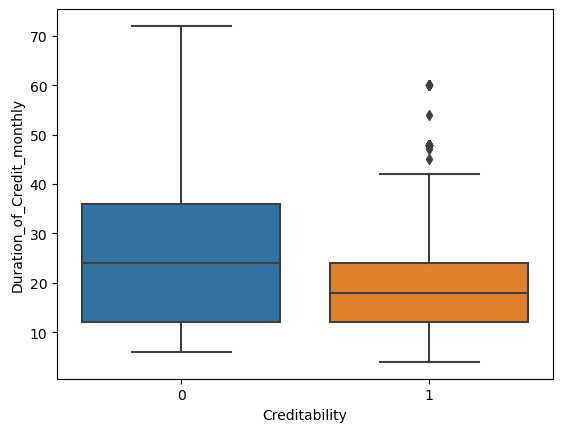

In [38]:
sns.boxplot(x='Creditability', y='Duration_of_Credit_monthly', data = df)
# since there is a clear difference on Duration_of_Credit_monthly for both cases, this feature should be kept.

<Axes: xlabel='Payment_Status_of_Previous_Credit'>

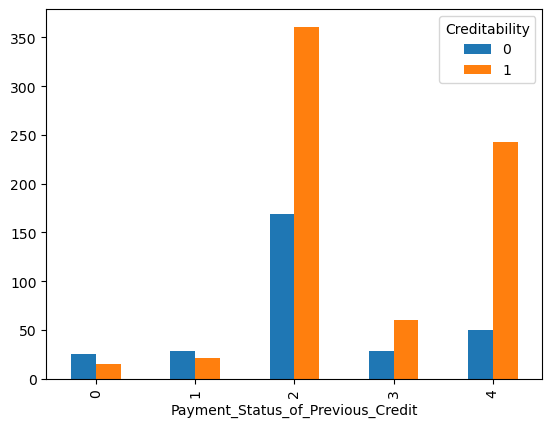

In [52]:
contingency_table = pd.crosstab(df['Payment_Status_of_Previous_Credit'], df['Creditability'])
contingency_table.plot(kind='bar')
# past credit history is a good indicator of future creditworthiness. moreover, some relationship can be osberved in the 
# figure below

<Axes: xlabel='Value_Savings_Stocks'>

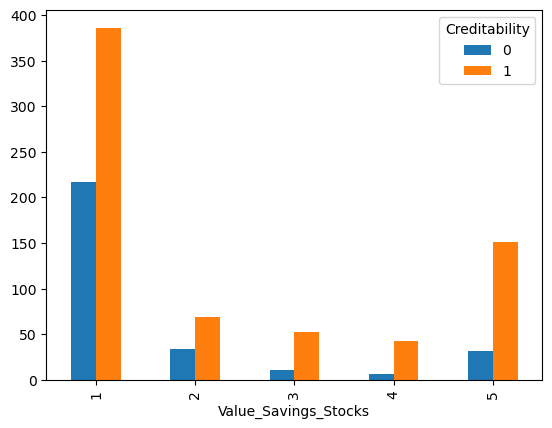

In [53]:

contingency_table = pd.crosstab(df['Value_Savings_Stocks'], df['Creditability'])
contingency_table.plot(kind='bar')
# some relationship can be observed, should be included.

<Axes: xlabel='Purpose'>

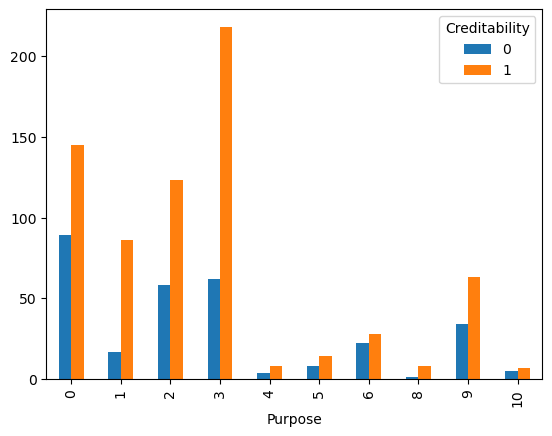

In [39]:
contingency_table = pd.crosstab(df['Purpose'], df['Creditability'])
contingency_table.plot(kind='bar')

# there is some observable relationship between creditability and Purpose 0, 1, 2, 3, 9. Hence, it is good to retain this feature either.

<Axes: xlabel='Length_of_current_employment'>

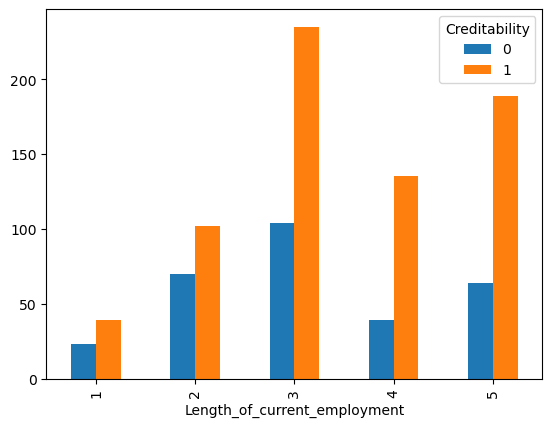

In [40]:
contingency_table = pd.crosstab(df['Length_of_current_employment'], df['Creditability'])
contingency_table.plot(kind='bar')
# there is some pattern between creditability and Length_of_current_employmen so it's kept.

<Axes: xlabel='Creditability', ylabel='Instalment_per_cent'>

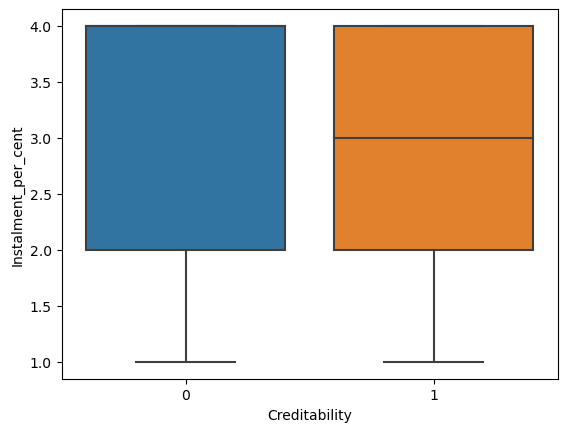

In [41]:
sns.boxplot(x='Creditability', y='Instalment_per_cent', data=df)
# no apparent relationship so this feature is discarded.

<Axes: xlabel='Sex_Marital_Status'>

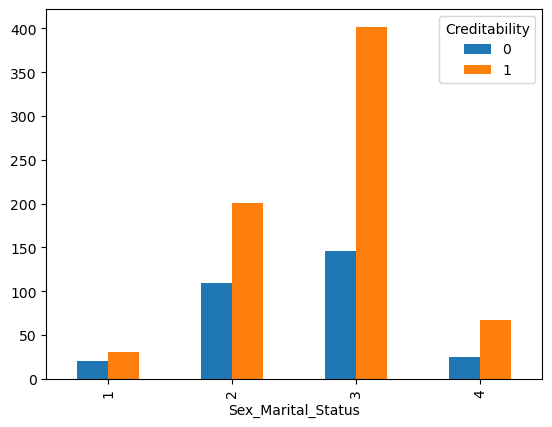

In [42]:
contingency_table = pd.crosstab(df['Sex_Marital_Status'], df['Creditability'])
contingency_table.plot(kind='bar')
#Ambigous, could be kept or discarded, we will see the effect later.

<Axes: xlabel='Guarantors'>

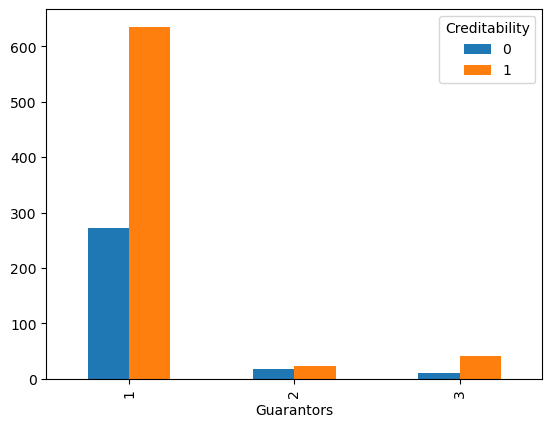

In [43]:
contingency_table = pd.crosstab(df['Guarantors'], df['Creditability'])
contingency_table.plot(kind='bar')
# no strong relationship, can be discarded

<Axes: xlabel='Creditability', ylabel='Duration_in_Current_address'>

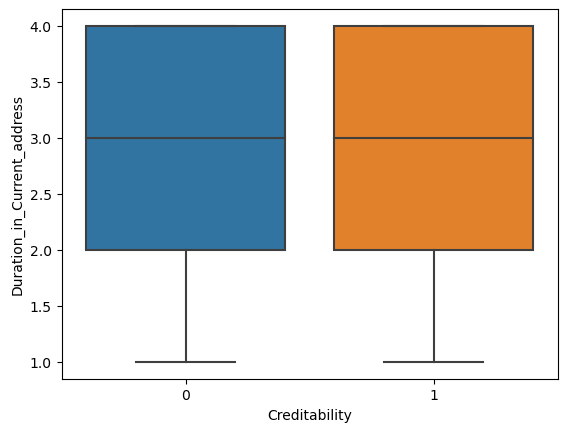

In [44]:
sns.boxplot(x='Creditability', y='Duration_in_Current_address', data=df)
#not useful

<Axes: xlabel='Most_valuable_available_asset'>

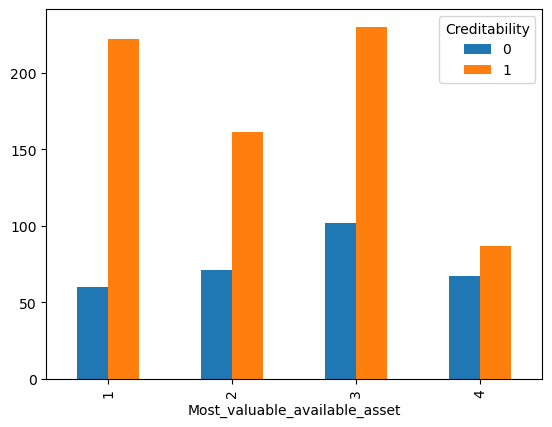

In [45]:
contingency_table = pd.crosstab(df['Most_valuable_available_asset'], df['Creditability'])
contingency_table.plot(kind='bar')
#could be used, we will see the effect later(by inlcuding and exluding once)

<Axes: xlabel='Creditability', ylabel='Age_years'>

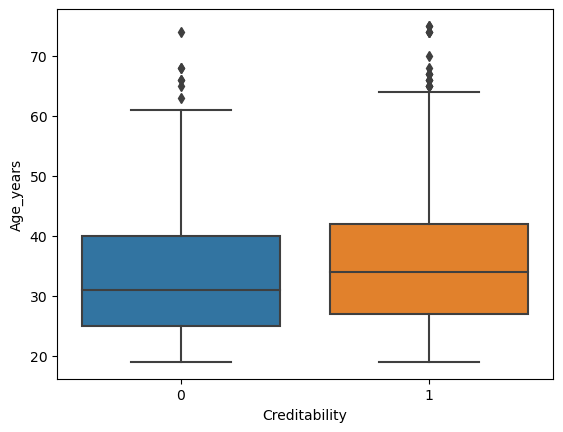

In [46]:
sns.boxplot(x='Creditability', y='Age_years', data=df)
# not much difference, excluded

<Axes: xlabel='Creditability', ylabel='Concurrent_Credits'>

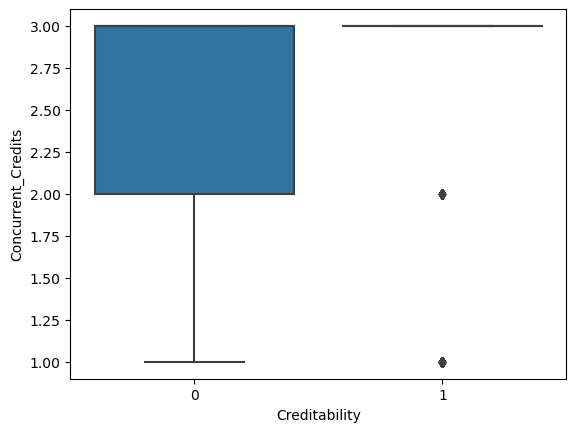

In [47]:
sns.boxplot(x='Creditability', y='Concurrent_Credits', data=df)

<Axes: xlabel='Concurrent_Credits'>

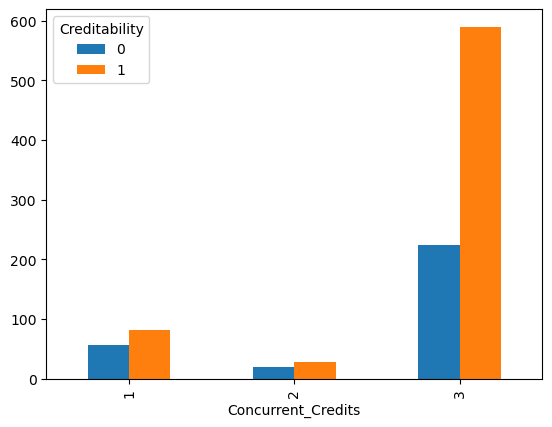

In [48]:
contingency_table = pd.crosstab(df['Concurrent_Credits'], df['Creditability'])
contingency_table.plot(kind='bar')
# from a domain understanding prespective, this feature should be included as the \
#number of credits a person already has would affect their creditability.

<Axes: xlabel='Type_of_apartment'>

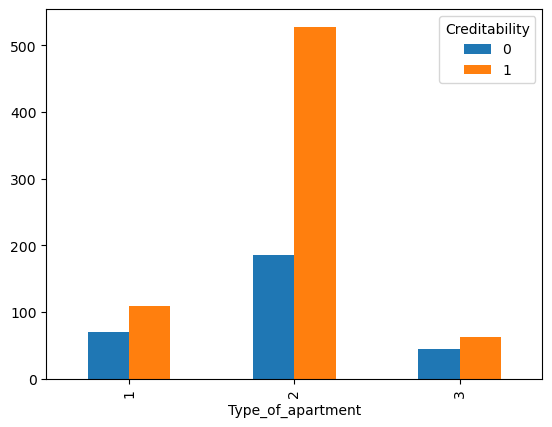

In [49]:
contingency_table = pd.crosstab(df['Type_of_apartment'], df['Creditability'])
contingency_table.plot(kind='bar')
# should be discared

<Axes: xlabel='No_of_Credits_at_this_Bank'>

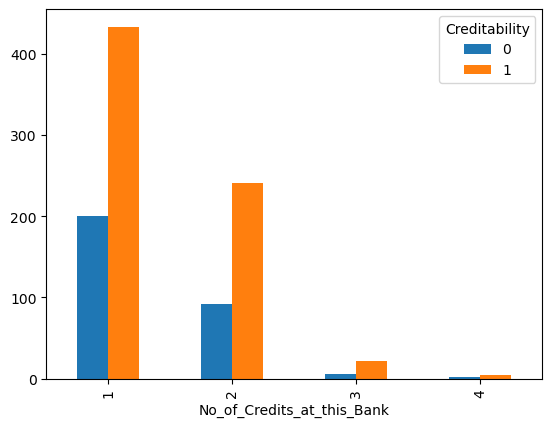

In [51]:
contingency_table = pd.crosstab(df['No_of_Credits_at_this_Bank'], df['Creditability'])
contingency_table.plot(kind='bar')
# some relationship can be seen and on top of that no of credit at this bank is a good indicator for further creditworthiness.

In [54]:
df_reduced = df[[
    "Account_Balance", "Payment_Status_of_Previous_Credit", "Duration_of_Credit_monthly", "Value_Savings_Stocks", "Credit_Amount", \
"Purpose", "Length_of_current_employment", "Most_valuable_available_asset", "Concurrent_Credits", "No_of_Credits_at_this_Bank"
]]
df_reduced.head()

,Account_Balance,Payment_Status_of_Previous_Credit,Duration_of_Credit_monthly,Value_Savings_Stocks,Credit_Amount,Purpose,Length_of_current_employment,Most_valuable_available_asset,Concurrent_Credits,No_of_Credits_at_this_Bank
0,1,4,18,1,1049,2,2,2,3,1
1,1,4,9,1,2799,0,3,1,3,2
2,2,2,12,2,841,9,4,1,3,1
3,1,4,12,1,2122,0,3,1,3,2
4,1,4,12,1,2171,0,3,2,1,2


In [57]:
numericals2 = ["Duration_of_Credit_monthly", "Credit_Amount", "Length_of_current_employment", 
"No_of_Credits_at_this_Bank", 'Concurrent_Credits']
categoricals2 = list(set(df_reduced.columns) - set(numericals))
categoricals2

['Account_Balance',
 'Purpose',
 'Payment_Status_of_Previous_Credit',
 'Most_valuable_available_asset',
 'Value_Savings_Stocks']

In [60]:
ct2 = ColumnTransformer(transformers=[('Scaling', StandardScaler(), numericals2),
                                      ('one-hot encoding', OneHotEncoder(), categoricals2)
                                    ])
df_new = ct2.fit_transform(df_reduced)
df_new = pd.DataFrame(df_new, columns=ct2.get_feature_names_out())
df_new.head()

,Scaling__Duration_of_Credit_monthly,Scaling__Credit_Amount,Scaling__Length_of_current_employment,Scaling__No_of_Credits_at_this_Bank,Scaling__Concurrent_Credits,one-hot encoding__Account_Balance_1,one-hot encoding__Account_Balance_2,one-hot encoding__Account_Balance_3,one-hot encoding__Account_Balance_4,one-hot encoding__Purpose_0,...,one-hot encoding__Payment_Status_of_Previous_Credit_4,one-hot encoding__Most_valuable_available_asset_1,one-hot encoding__Most_valuable_available_asset_2,one-hot encoding__Most_valuable_available_asset_3,one-hot encoding__Most_valuable_available_asset_4,one-hot encoding__Value_Savings_Stocks_1,one-hot encoding__Value_Savings_Stocks_2,one-hot encoding__Value_Savings_Stocks_3,one-hot encoding__Value_Savings_Stocks_4,one-hot encoding__Value_Savings_Stocks_5
0,-0.240857,-0.787657,-1.145978,-0.704926,0.460831,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.987573,-0.167384,-0.317959,1.027079,0.460831,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.738668,-0.861381,0.510060,-0.704926,0.460831,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.738668,-0.407341,-0.317959,1.027079,0.460831,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.738668,-0.389974,-0.317959,1.027079,-2.375050,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


<Axes: xlabel='Creditability', ylabel='count'>

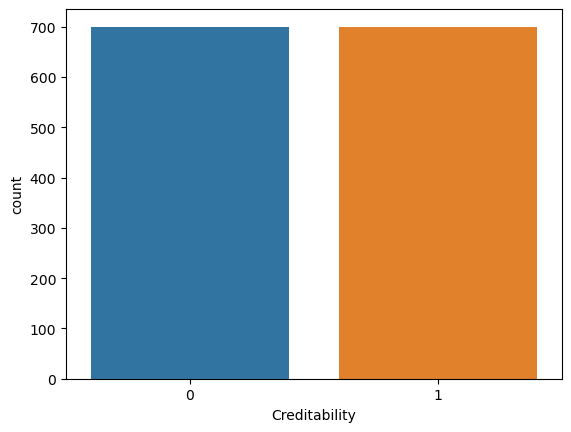

In [61]:


X = df_new
y = creditability

from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=2)
x_bal, y_bal = oversample.fit_resample(X, y)
sns.countplot(pd.DataFrame(y_bal), x = 'Creditability')

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x_bal, y_bal, test_size = 0.25)

clf = xgb.XGBClassifier(random_state=3)
clf.fit(x_train, y_train)

predicted = clf.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, predicted))
print('fl_Score: ', f1_score(y_test, predicted))
print('Precision: ', precision_score(y_test, predicted))
print('recall: ', recall_score(y_test, predicted))
# reducing the number of features has resulted in small increase in accuracy.


0.8571428571428571